# Riesgo de incumplimiento crediticio de la vivienda

## Librerias

In [1]:
import pandas as pd
import numpy as np
from herramientas import obtener_resumen_valores_unicos

import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

In [2]:
application_test = pd.read_csv('/home/bbchanchis/metadata/home_credit/data/application_test.csv')
application_train = pd.read_csv('/home/bbchanchis/metadata/home_credit/data/application_train.csv')
burea_balance = pd.read_csv('data/bureau_balance.csv')
bureau = pd.read_csv('data/bureau.csv')
credit_card_balance = pd.read_csv('data/credit_card_balance.csv')
HomeCredit = pd.read_csv('data/HomeCredit_columns_description.csv', encoding='ISO-8859-1')
installments_payment = pd.read_csv('data/installments_payments.csv')
pos_cash_balance = pd.read_csv('data/POS_CASH_balance.csv')
previous_application = pd.read_csv('data/previous_application.csv')

## Visualización de los df

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
obtener_resumen_valores_unicos(application_test)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_CURR,int64,48744,48744,0
1,NAME_CONTRACT_TYPE,object,2,48744,0
2,CODE_GENDER,object,2,48744,0
3,FLAG_OWN_CAR,object,2,48744,0
4,FLAG_OWN_REALTY,object,2,48744,0
5,CNT_CHILDREN,int64,11,48744,0
6,AMT_INCOME_TOTAL,float64,606,48744,0
7,AMT_CREDIT,float64,2937,48744,0
8,AMT_ANNUITY,float64,7491,48720,24
9,AMT_GOODS_PRICE,float64,677,48744,0


In [5]:
obtener_resumen_valores_unicos(application_train)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_CURR,int64,307511,307511,0
1,TARGET,int64,2,307511,0
2,NAME_CONTRACT_TYPE,object,2,307511,0
3,CODE_GENDER,object,3,307511,0
4,FLAG_OWN_CAR,object,2,307511,0
5,FLAG_OWN_REALTY,object,2,307511,0
6,CNT_CHILDREN,int64,15,307511,0
7,AMT_INCOME_TOTAL,float64,2548,307511,0
8,AMT_CREDIT,float64,5603,307511,0
9,AMT_ANNUITY,float64,13672,307499,12


In [6]:
# oficina_equilibrio
obtener_resumen_valores_unicos(burea_balance)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_BUREAU,int64,817395,27299925,0
1,MONTHS_BALANCE,int64,97,27299925,0
2,STATUS,object,8,27299925,0


In [7]:
# oficina
obtener_resumen_valores_unicos(bureau)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_CURR,int64,305811,1716428,0
1,SK_ID_BUREAU,int64,1716428,1716428,0
2,CREDIT_ACTIVE,object,4,1716428,0
3,CREDIT_CURRENCY,object,4,1716428,0
4,DAYS_CREDIT,int64,2923,1716428,0
5,CREDIT_DAY_OVERDUE,int64,942,1716428,0
6,DAYS_CREDIT_ENDDATE,float64,14096,1610875,105553
7,DAYS_ENDDATE_FACT,float64,2917,1082775,633653
8,AMT_CREDIT_MAX_OVERDUE,float64,68251,591940,1124488
9,CNT_CREDIT_PROLONG,int64,10,1716428,0


In [8]:
obtener_resumen_valores_unicos(credit_card_balance)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_PREV,int64,104307,3840312,0
1,SK_ID_CURR,int64,103558,3840312,0
2,MONTHS_BALANCE,int64,96,3840312,0
3,AMT_BALANCE,float64,1347904,3840312,0
4,AMT_CREDIT_LIMIT_ACTUAL,int64,181,3840312,0
5,AMT_DRAWINGS_ATM_CURRENT,float64,2267,3090496,749816
6,AMT_DRAWINGS_CURRENT,float64,187005,3840312,0
7,AMT_DRAWINGS_OTHER_CURRENT,float64,1832,3090496,749816
8,AMT_DRAWINGS_POS_CURRENT,float64,168748,3090496,749816
9,AMT_INST_MIN_REGULARITY,float64,312266,3535076,305236


In [9]:
obtener_resumen_valores_unicos(HomeCredit)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,Unnamed: 0,int64,219,219,0
1,Table,object,7,219,0
2,Row,object,196,219,0
3,Description,object,163,219,0
4,Special,object,7,86,133


In [10]:
# pago_cuotas
obtener_resumen_valores_unicos(installments_payment)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_PREV,int64,997752,13605401,0
1,SK_ID_CURR,int64,339587,13605401,0
2,NUM_INSTALMENT_VERSION,float64,65,13605401,0
3,NUM_INSTALMENT_NUMBER,int64,277,13605401,0
4,DAYS_INSTALMENT,float64,2922,13605401,0
5,DAYS_ENTRY_PAYMENT,float64,3039,13602496,2905
6,AMT_INSTALMENT,float64,902539,13605401,0
7,AMT_PAYMENT,float64,944235,13602496,2905


In [11]:
obtener_resumen_valores_unicos(pos_cash_balance)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_PREV,int64,936325,10001358,0
1,SK_ID_CURR,int64,337252,10001358,0
2,MONTHS_BALANCE,int64,96,10001358,0
3,CNT_INSTALMENT,float64,73,9975287,26071
4,CNT_INSTALMENT_FUTURE,float64,79,9975271,26087
5,NAME_CONTRACT_STATUS,object,9,10001358,0
6,SK_DPD,int64,3400,10001358,0
7,SK_DPD_DEF,int64,2307,10001358,0


In [12]:
obtener_resumen_valores_unicos(previous_application)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_PREV,int64,1670214,1670214,0
1,SK_ID_CURR,int64,338857,1670214,0
2,NAME_CONTRACT_TYPE,object,4,1670214,0
3,AMT_ANNUITY,float64,357959,1297979,372235
4,AMT_APPLICATION,float64,93885,1670214,0
5,AMT_CREDIT,float64,86803,1670213,1
6,AMT_DOWN_PAYMENT,float64,29278,774370,895844
7,AMT_GOODS_PRICE,float64,93885,1284699,385515
8,WEEKDAY_APPR_PROCESS_START,object,7,1670214,0
9,HOUR_APPR_PROCESS_START,int64,24,1670214,0


## EDA application_train

In [13]:
df = application_train

###  Distribución de género de los solicitantes

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


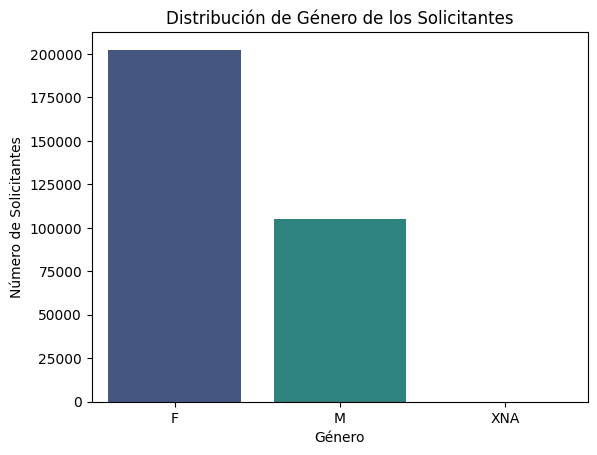

In [14]:
# Contar el número de solicitantes por género
distribucion_genero = df['CODE_GENDER'].value_counts()

# Imprimir la distribución
print(distribucion_genero)

# Visualizar la distribución
sns.barplot(x=distribucion_genero.index, y=distribucion_genero.values, palette="viridis")
plt.title('Distribución de Género de los Solicitantes')
plt.xlabel('Género')
plt.ylabel('Número de Solicitantes')
plt.show()

## Solicitantes poseen un automóvil o una propiedad

In [15]:
# Contar cuántos solicitantes poseen un automóvil
autos = df['FLAG_OWN_CAR'].value_counts()
print("Número de solicitantes que poseen un automóvil:")
print(autos)

# Contar cuántos solicitantes poseen una propiedad
propiedad = df['FLAG_OWN_REALTY'].value_counts()
print("\nNúmero de solicitantes que poseen una propiedad:")
print(propiedad)

Número de solicitantes que poseen un automóvil:
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

Número de solicitantes que poseen una propiedad:
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64


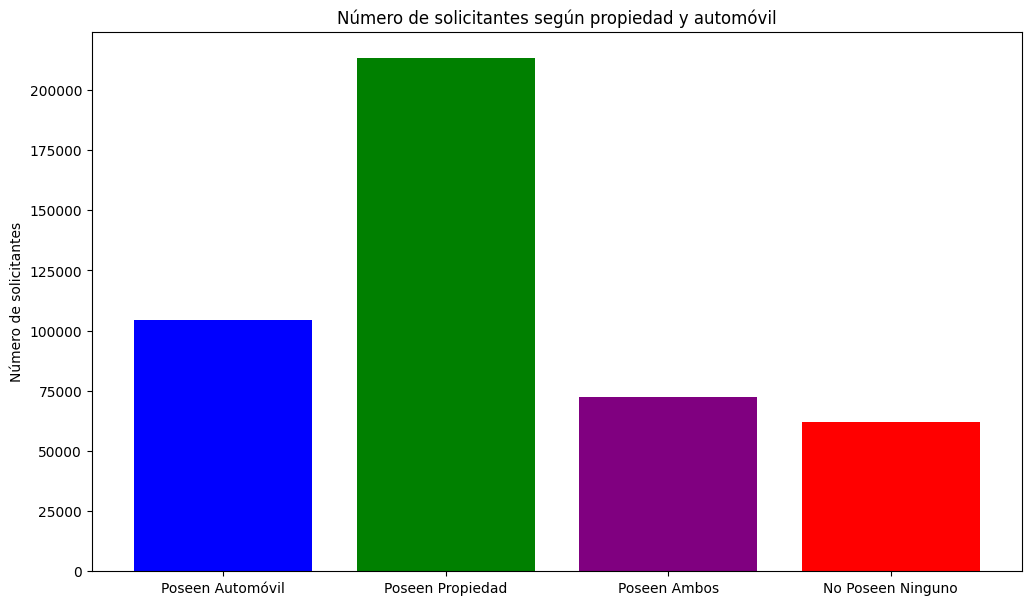

In [16]:
# Calcular el número de solicitantes que poseen un automóvil y/o una propiedad
autos = df[df['FLAG_OWN_CAR'] == 'Y'].shape[0]
propiedad = df[df['FLAG_OWN_REALTY'] == 'Y'].shape[0]
ambos = df[(df['FLAG_OWN_CAR'] == 'Y') & (df['FLAG_OWN_REALTY'] == 'Y')].shape[0]
ninguno = df[(df['FLAG_OWN_CAR'] == 'N') & (df['FLAG_OWN_REALTY'] == 'N')].shape[0]



# Crear una lista con los valores y las etiquetas
valores = [autos, propiedad, ambos, ninguno ]
etiquetas = ['Poseen Automóvil', 'Poseen Propiedad', 'Poseen Ambos', 'No Poseen Ninguno']

# Crear el gráfico de barras
plt.figure(figsize=(12, 7))
plt.bar(etiquetas, valores, color=['blue', 'green', 'purple', 'red'])
plt.title('Número de solicitantes según propiedad y automóvil')
plt.ylabel('Número de solicitantes')
plt.show()

## Distribución de los solicitantes según el tipo de ingresos, educación, estado civil y tipo de vivienda

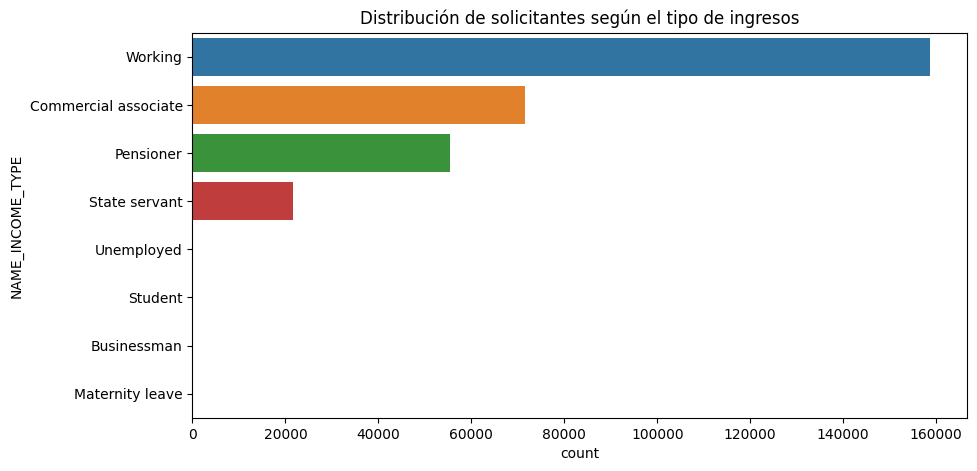

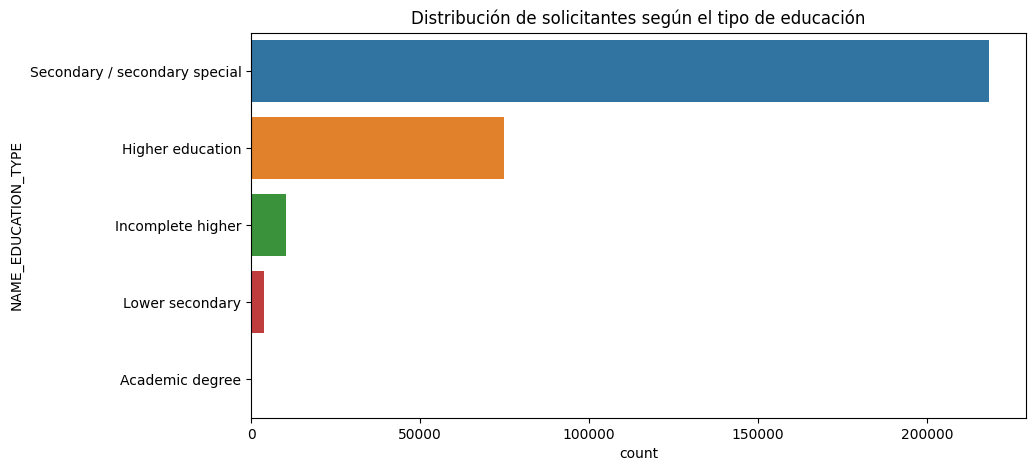

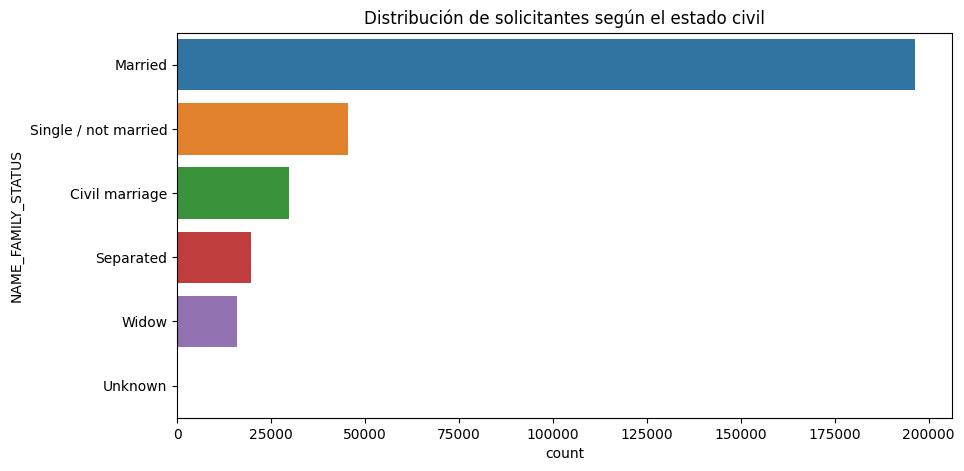

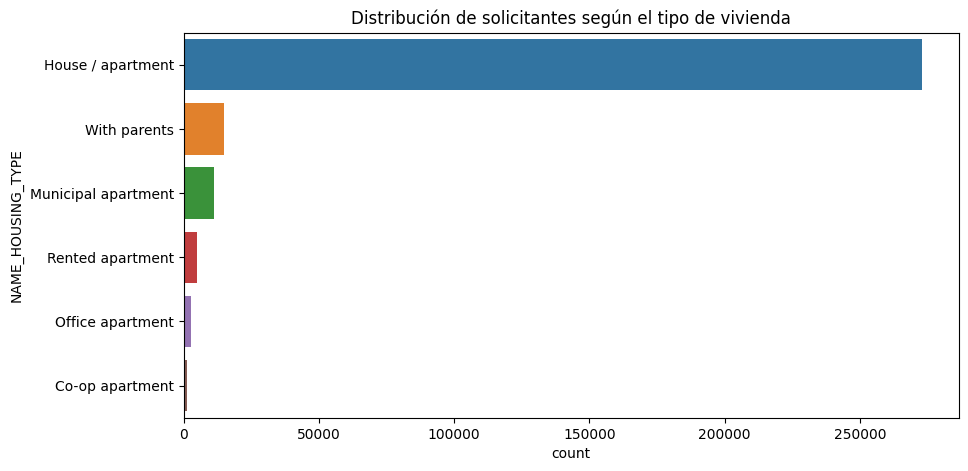

In [17]:
# Distribución según el tipo de ingresos
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='NAME_INCOME_TYPE', order=df['NAME_INCOME_TYPE'].value_counts().index)
plt.title('Distribución de solicitantes según el tipo de ingresos')
plt.show()

# Distribución según el tipo de educación
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='NAME_EDUCATION_TYPE', order=df['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title('Distribución de solicitantes según el tipo de educación')
plt.show()

# Distribución según el estado civil
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='NAME_FAMILY_STATUS', order=df['NAME_FAMILY_STATUS'].value_counts().index)
plt.title('Distribución de solicitantes según el estado civil')
plt.show()

# Distribución según el tipo de vivienda
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='NAME_HOUSING_TYPE', order=df['NAME_HOUSING_TYPE'].value_counts().index)
plt.title('Distribución de solicitantes según el tipo de vivienda')
plt.show()


## Edad media de los solicitantes

In [18]:
edad_media = (-df['DAYS_BIRTH'] / 365.25).mean()  # Usamos un signo negativo porque normalmente estos valores son negativos para representar "hace cuántos días nació".

print(f"La edad media de los solicitantes es de aproximadamente {edad_media:.2f} años.")


La edad media de los solicitantes es de aproximadamente 43.91 años.


## Ingreso medio de los solicitantes

In [19]:
ingreso_medio = df['AMT_INCOME_TOTAL'].mean()

print(f"El ingreso medio de los solicitantes es: {ingreso_medio}")

El ingreso medio de los solicitantes es: 168797.9192969845


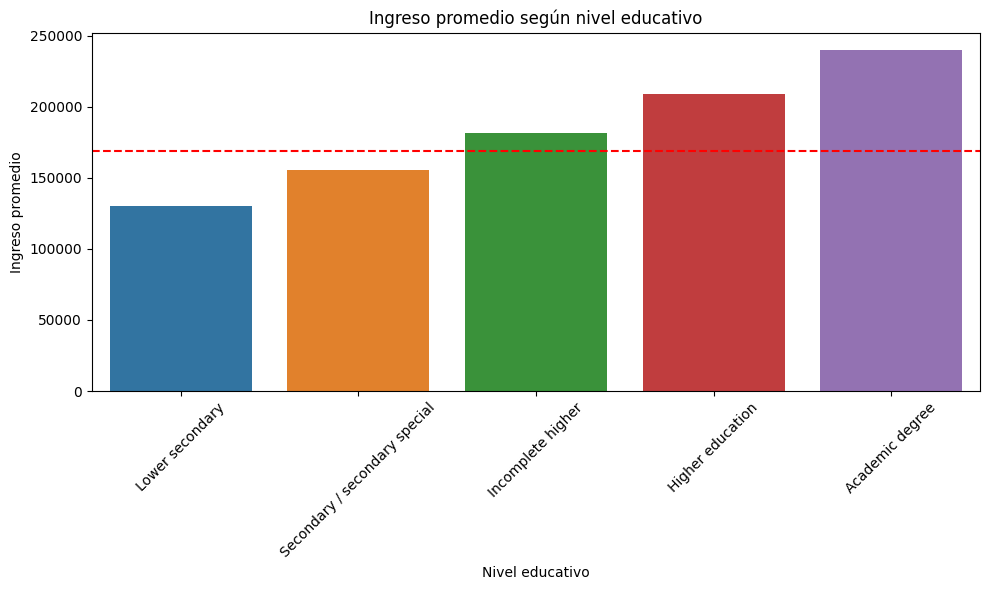

In [20]:
# Agrupamos por nivel educativo y calculamos la media del ingreso
avg_income_education = df.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].mean().sort_values()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_income_education.index, y=avg_income_education.values)
plt.title('Ingreso promedio según nivel educativo')
plt.axhline(y=168797.91, color='r', linestyle='--', label='Media de ingresos')
plt.xlabel('Nivel educativo')
plt.ylabel('Ingreso promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

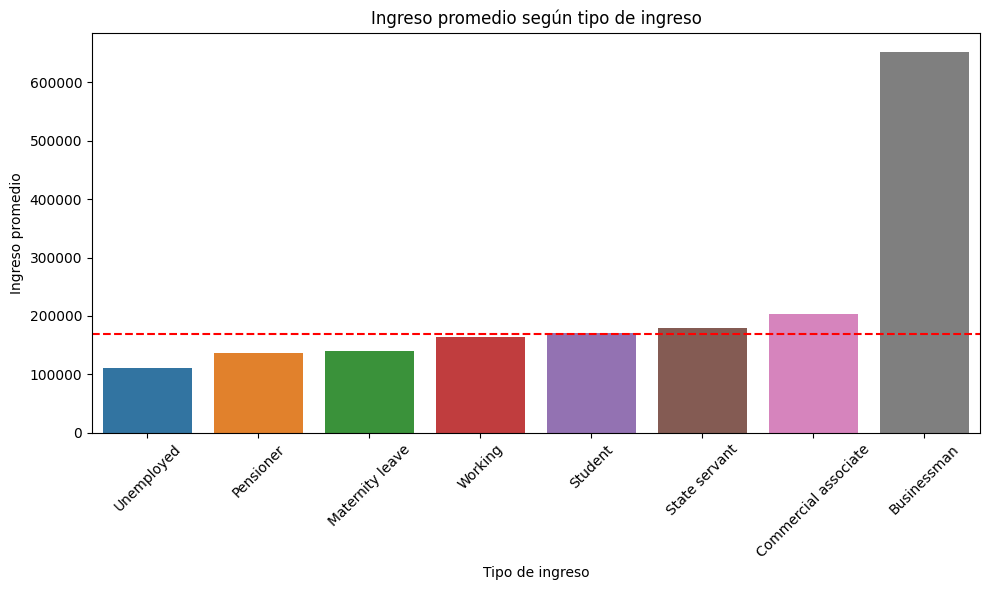

In [21]:
# Agrupamos por tipo de ingreso y calculamos la media del ingreso
avg_income_type = df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].mean().sort_values()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_income_type.index, y=avg_income_type.values)
plt.axhline(y=168797.91, color='r', linestyle='--', label='Media de ingresos')
plt.title('Ingreso promedio según tipo de ingreso')
plt.xlabel('Tipo de ingreso')
plt.ylabel('Ingreso promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlación entre poseer un automóvil y el nivel de ingreso

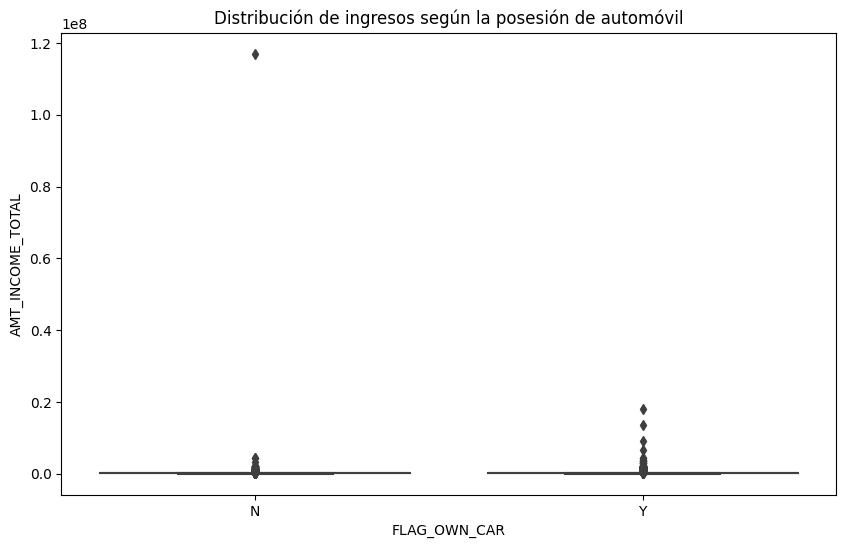

In [22]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='FLAG_OWN_CAR', y='AMT_INCOME_TOTAL', data=df)
plt.title('Distribución de ingresos según la posesión de automóvil')
plt.show()

In [23]:
# Filtrar el dataframe para aquellos que no tienen coche
no_car_df = df[df['FLAG_OWN_CAR'] == 'N']

# Calcular el Q1 (cuartil 25) y Q3 (cuartil 75)
Q1 = no_car_df['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = no_car_df['AMT_INCOME_TOTAL'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir límites para outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


In [24]:
# Filtrar el dataframe para aquellos que no tienen coche
yes_car_df = df[df['FLAG_OWN_CAR'] == 'Y']

# Calcular el Q1 (cuartil 25) y Q3 (cuartil 75)
Q1 = yes_car_df['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = yes_car_df['AMT_INCOME_TOTAL'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir límites para outliers
lower_limit1 = Q1 - 1.5 * IQR
upper_limit1 = Q3 + 1.5 * IQR


In [25]:
# Eliminamos outliers 
df1 = df[~((df['FLAG_OWN_CAR'] == 'N') & (df['AMT_INCOME_TOTAL'] < lower_limit) | (df['AMT_INCOME_TOTAL'] > upper_limit))]
df2 = df[~((df['FLAG_OWN_CAR'] == 'Y') & (df['AMT_INCOME_TOTAL'] < lower_limit1) | (df['AMT_INCOME_TOTAL'] > upper_limit1))]


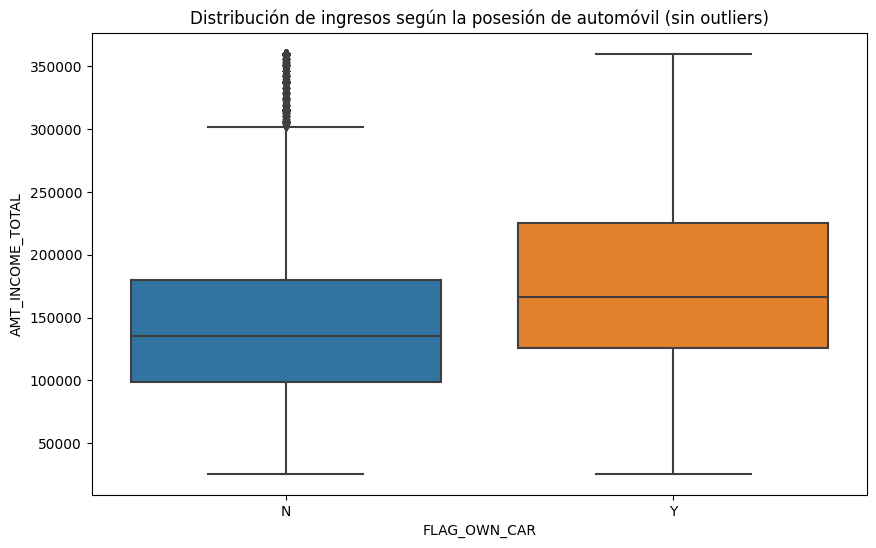

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='FLAG_OWN_CAR', y='AMT_INCOME_TOTAL', data=df2)
plt.title('Distribución de ingresos según la posesión de automóvil (sin outliers)')
plt.show()


## Distribución de la cantidad de crédito solicitado

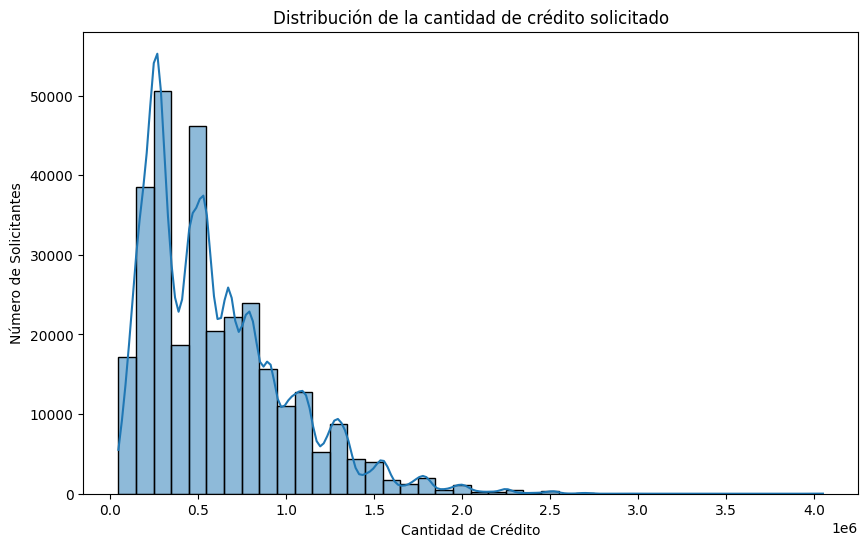

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AMT_CREDIT'], bins=40, kde=True)  # kde=True añade una estimación de densidad de kernel
plt.title('Distribución de la cantidad de crédito solicitado')
plt.xlabel('Cantidad de Crédito')
plt.ylabel('Número de Solicitantes')
plt.show()


##  Relación entre ingreso y cantidad de crédito solicitado

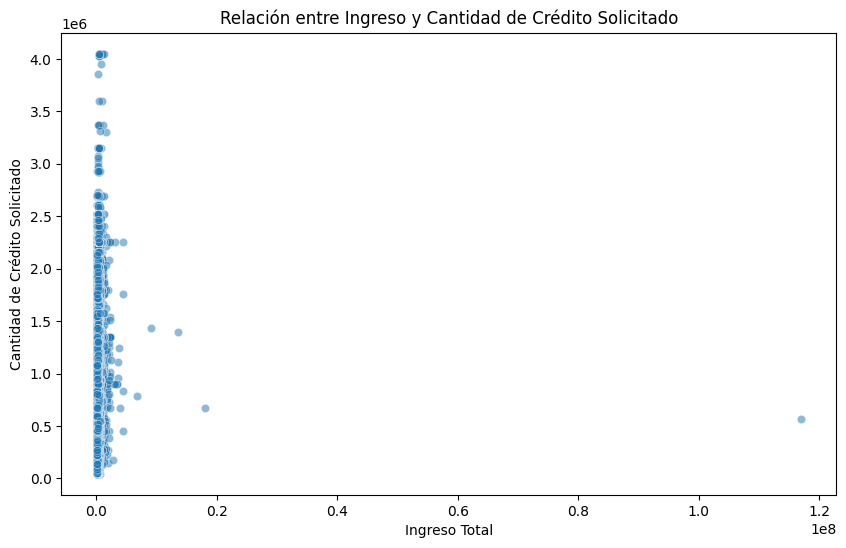

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=df, alpha=0.5)
plt.title('Relación entre Ingreso y Cantidad de Crédito Solicitado')
plt.xlabel('Ingreso Total')
plt.ylabel('Cantidad de Crédito Solicitado')
plt.show()


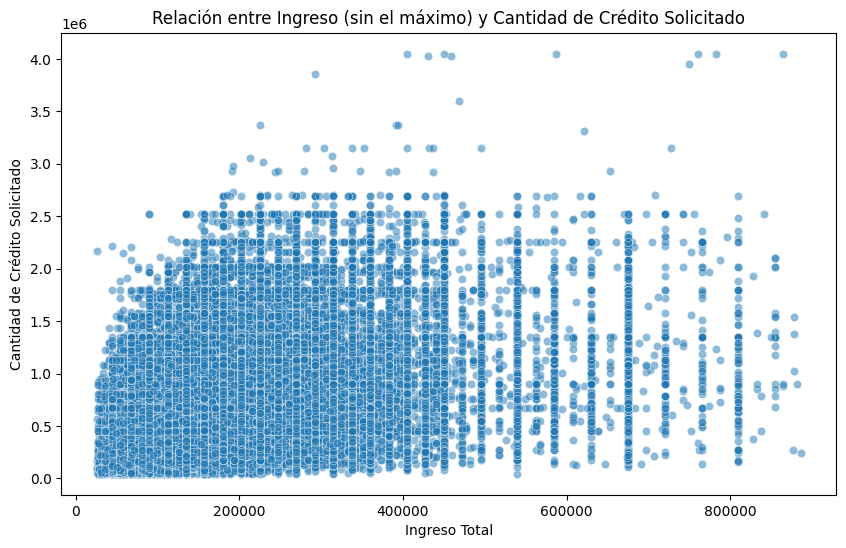

In [29]:
# Filtra el dataframe para excluir el ingreso más alto
max_income = df['AMT_INCOME_TOTAL'].max()
filtered_df = df[df['AMT_INCOME_TOTAL'] < 900000]

plt.figure(figsize=(10,6))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=filtered_df, alpha=0.5)
plt.title('Relación entre Ingreso (sin el máximo) y Cantidad de Crédito Solicitado')
plt.xlabel('Ingreso Total')
plt.ylabel('Cantidad de Crédito Solicitado')
plt.show()

## Diferencia en la cantidad de crédito solicitado según el género o la posesión de bienes

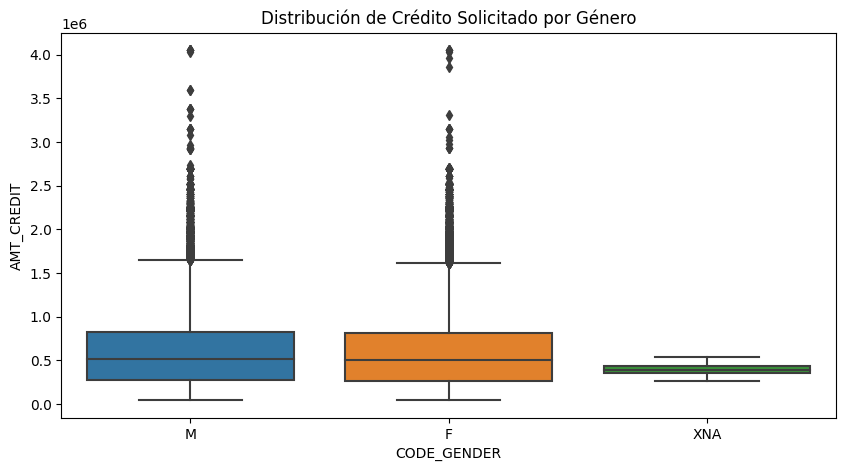

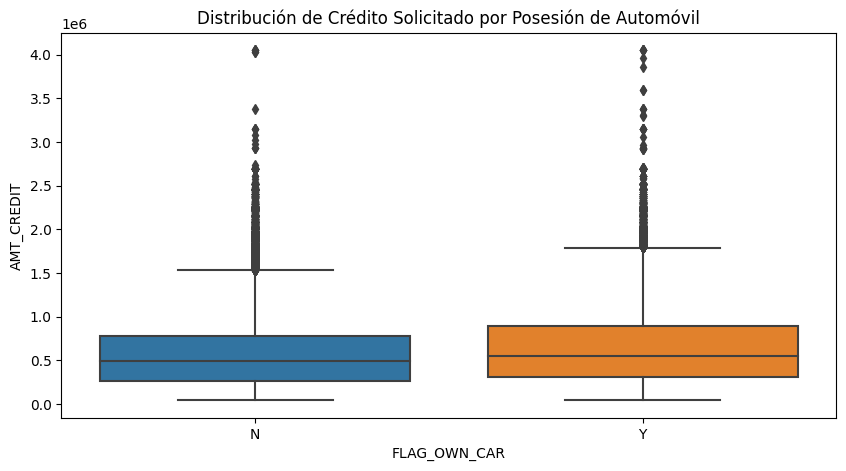

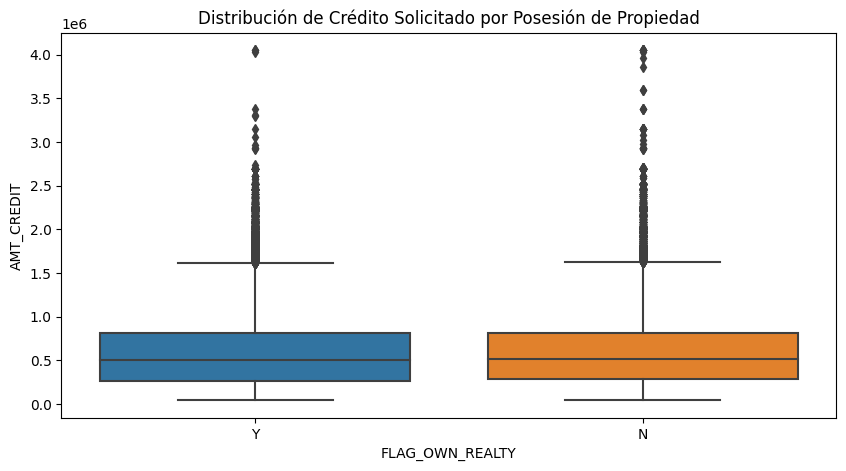

In [30]:
# Visualización de la cantidad de crédito solicitado según el género
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='CODE_GENDER', y='AMT_CREDIT')
plt.title('Distribución de Crédito Solicitado por Género')
plt.show()

# Visualización de la cantidad de crédito solicitado según la posesión de un automóvil
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='FLAG_OWN_CAR', y='AMT_CREDIT')
plt.title('Distribución de Crédito Solicitado por Posesión de Automóvil')
plt.show()

# Visualización de la cantidad de crédito solicitado según la posesión de una propiedad
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='FLAG_OWN_REALTY', y='AMT_CREDIT')
plt.title('Distribución de Crédito Solicitado por Posesión de Propiedad')
plt.show()


In [31]:
def remove_outliers(df, column_name):
    '''Función para remover outliers basados en el IQR'''
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[column_name] >= Q1 - 1.5 * IQR) & (df[column_name] <= Q3 + 1.5 * IQR)
    return df.loc[filter]

# Remover outliers para la columna 'AMT_CREDIT'
df_clean = remove_outliers(df, 'AMT_CREDIT')

# Mostrar el tamaño original del DataFrame y después de remover los outliers
print(f"Original size: {df.shape}")
print(f"Size after removing outliers: {df_clean.shape}")


Original size: (307511, 122)
Size after removing outliers: (300949, 122)


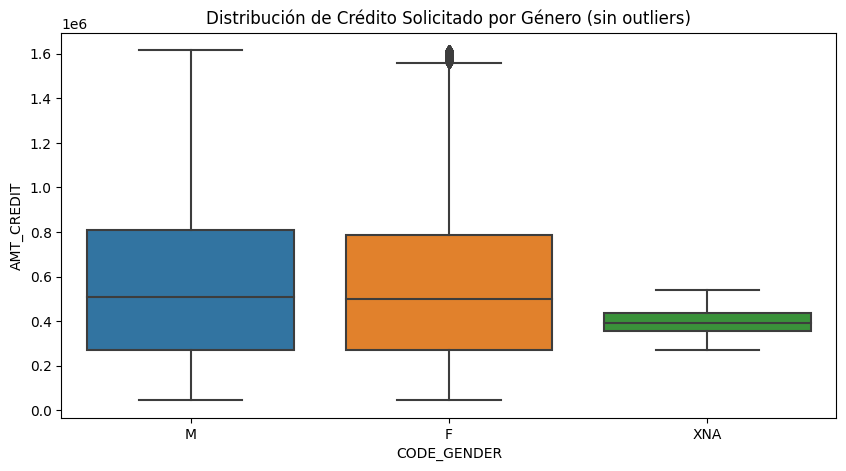

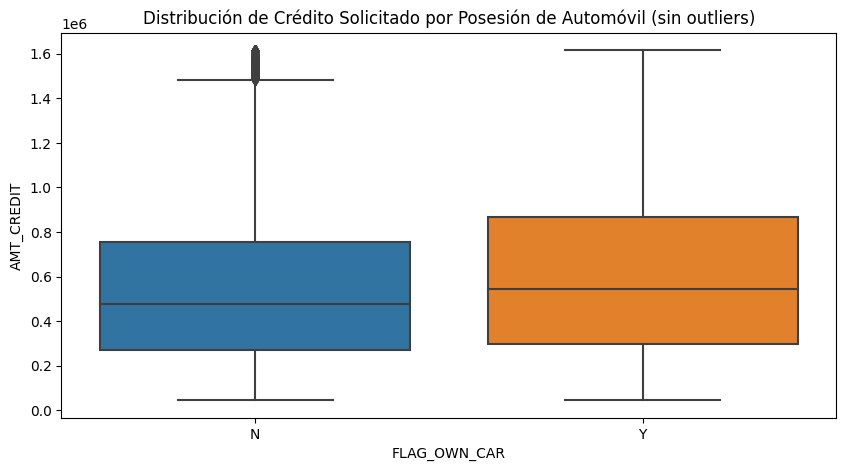

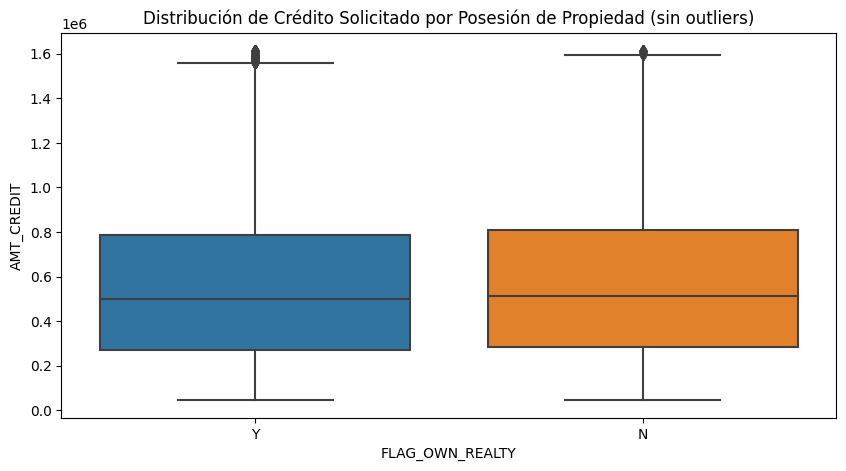

In [32]:
# Visualización de la cantidad de crédito solicitado según el género
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean, x='CODE_GENDER', y='AMT_CREDIT')
plt.title('Distribución de Crédito Solicitado por Género (sin outliers)')
plt.show()

# Visualización de la cantidad de crédito solicitado según la posesión de un automóvil
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean, x='FLAG_OWN_CAR', y='AMT_CREDIT')
plt.title('Distribución de Crédito Solicitado por Posesión de Automóvil (sin outliers)')
plt.show()

# Visualización de la cantidad de crédito solicitado según la posesión de una propiedad
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean, x='FLAG_OWN_REALTY', y='AMT_CREDIT')
plt.title('Distribución de Crédito Solicitado por Posesión de Propiedad (sin outliers)')
plt.show()


## Tiempo han estado trabajando los solicitantes en promedio

In [33]:
promedio_dias = abs(df['DAYS_EMPLOYED']).mean()

# Convertir el promedio de días a años para una mejor interpretación
promedio_anios = promedio_dias / 365

print(f"El tiempo promedio que los solicitantes han estado trabajando es de aproximadamente {promedio_anios:.2f} años.")
### imposible

El tiempo promedio que los solicitantes han estado trabajando es de aproximadamente 185.55 años.


In [34]:
valores_unicos_descendentes = df['DAYS_EMPLOYED'].unique()
valores_unicos_descendentes = sorted(valores_unicos_descendentes, reverse=True)

print(valores_unicos_descendentes)

[365243, 0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38, -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51, -52, -53, -54, -55, -56, -57, -58, -59, -60, -61, -62, -63, -64, -65, -66, -67, -68, -69, -70, -71, -72, -73, -74, -75, -76, -77, -78, -79, -80, -81, -82, -83, -84, -85, -86, -87, -88, -89, -90, -91, -92, -93, -94, -95, -96, -97, -98, -99, -100, -101, -102, -103, -104, -105, -106, -107, -108, -109, -110, -111, -112, -113, -114, -115, -116, -117, -118, -119, -120, -121, -122, -123, -124, -125, -126, -127, -128, -129, -130, -131, -132, -133, -134, -135, -136, -137, -138, -139, -140, -141, -142, -143, -144, -145, -146, -147, -148, -149, -150, -151, -152, -153, -154, -155, -156, -157, -158, -159, -160, -161, -162, -163, -164, -165, -166, -167, -168, -169, -170, -171, -172, -173, -174, -175, -176, -177, -178, -179, -180, -181, -182, -183

In [35]:
df_filtrado = df[df['DAYS_EMPLOYED'] == 365243]

In [36]:
df_filtrado.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [37]:
promedio_dias = abs(df[df['DAYS_EMPLOYED'] < 0]['DAYS_EMPLOYED']).mean()

# Convertir el promedio de días a años para una mejor interpretación
promedio_anios = promedio_dias / 365

print(f"El tiempo promedio que los solicitantes han estado trabajando es de aproximadamente {promedio_anios:.2f} años.")


El tiempo promedio que los solicitantes han estado trabajando es de aproximadamente 6.53 años.


In [38]:
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'] / -365.25

In [39]:
bins = [-np.inf, 1, 3, 5, 10, np.inf]  # Define bins for employment years
labels = ['<1', '1-3', '3-5', '5-10', '10+']  # Labels for the bins
df['EMPLOYMENT_GROUP'] = pd.cut(df['YEARS_EMPLOYED'], bins=bins, labels=labels)

grouped = df.groupby('EMPLOYMENT_GROUP')['AMT_CREDIT']
mean_credit_by_group = grouped.mean()
median_credit_by_group = grouped.median()

print("Monto promedio del crédito por grupo de años de empleo:")
print(mean_credit_by_group)

print("\nMonto medio del crédito por grupo de años de empleo:")
print(median_credit_by_group)

Monto promedio del crédito por grupo de años de empleo:
EMPLOYMENT_GROUP
<1      552301.102308
1-3     564334.538335
3-5     594488.162882
5-10    634576.191033
10+     676299.840247
Name: AMT_CREDIT, dtype: float64

Monto medio del crédito por grupo de años de empleo:
EMPLOYMENT_GROUP
<1      469152.0
1-3     472500.0
3-5     508495.5
5-10    544491.0
10+     585000.0
Name: AMT_CREDIT, dtype: float64


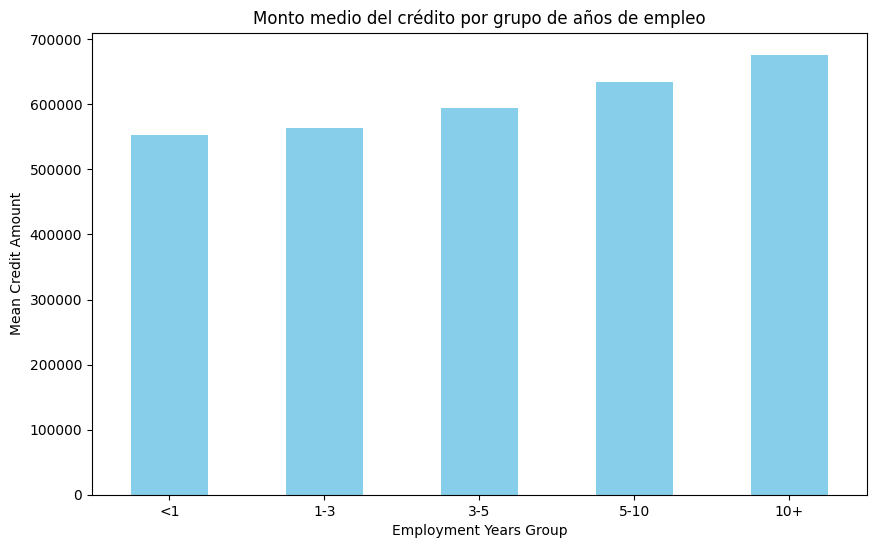

In [40]:
# Agrupa los datos y calcula la media de la cantidad de crédito solicitado en cada grupo
grouped = df.groupby('EMPLOYMENT_GROUP')['AMT_CREDIT'].mean()

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', color='skyblue')
plt.title('Monto medio del crédito por grupo de años de empleo')
plt.xlabel('Employment Years Group')
plt.ylabel('Mean Credit Amount')
plt.xticks(rotation=0)  # Para rotar las etiquetas en el eje x si es necesario
plt.show()

#  Análisis y distribución de las puntuaciones

In [41]:
scores_df = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].dropna()


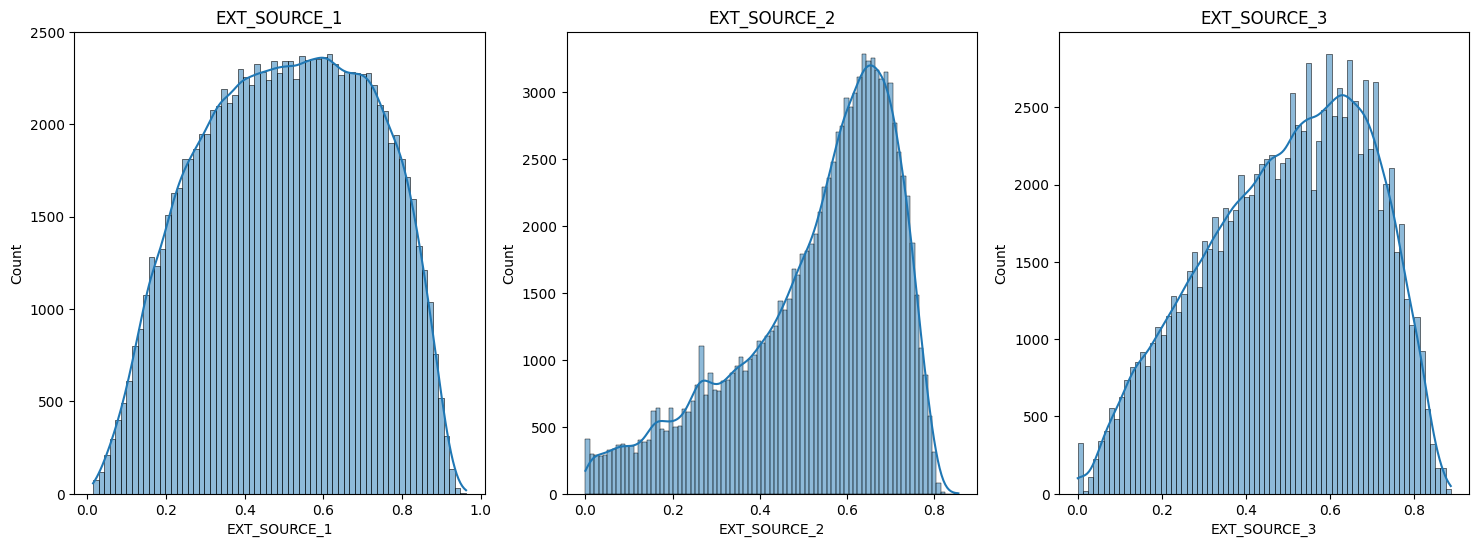

In [42]:
# Crear subplots para cada puntuación
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Puntuación 1 (EXT_SOURCE_1)
sns.histplot(scores_df['EXT_SOURCE_1'], kde=True, ax=axes[0])
axes[0].set_title('EXT_SOURCE_1')

# Puntuación 2 (EXT_SOURCE_2)
sns.histplot(scores_df['EXT_SOURCE_2'], kde=True, ax=axes[1])
axes[1].set_title('EXT_SOURCE_2')

# Puntuación 3 (EXT_SOURCE_3)
sns.histplot(scores_df['EXT_SOURCE_3'], kde=True, ax=axes[2])
axes[2].set_title('EXT_SOURCE_3')

plt.show()


In [43]:
scores_df.describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,109589.000000,109589.000000,109589.000000
mean,0.508071,0.529322,0.496702
std,0.210029,0.181934,0.194242
min,0.014568,0.000001,0.000527
25%,0.341588,0.425586,0.353988
50%,0.513584,0.577628,0.517297
75%,0.680429,0.668025,0.652897
max,0.962693,0.855000,0.887664


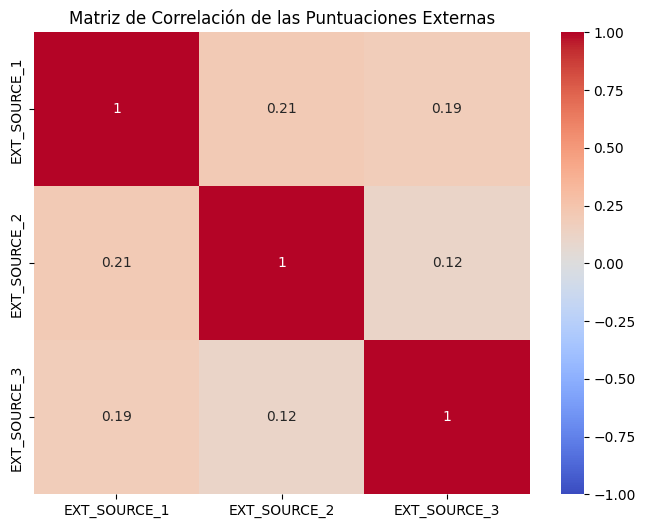

In [44]:
# Crear un DataFrame con las puntuaciones relevantes
scores_df = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].dropna()

# Calcular la matriz de correlación
correlation_matrix = scores_df.corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de las Puntuaciones Externas')
plt.show()

# Análisis de los datos relacionados con el tipo y características de las viviendas

In [45]:
viviendas_df = df[['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG']]

In [46]:
viviendas_df.describe()

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG
count,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000
mean,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358
std,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,0.161380,0.081184,0.092576,0.110565,0.047732,0.069523
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.05770,0.044200,0.976700,0.687200,0.007800,0.000000,0.069000,0.166700,0.083300,0.018700,0.050400,0.045300,0.000000,0.000000
50%,0.08760,0.076300,0.981600,0.755200,0.021100,0.000000,0.137900,0.166700,0.208300,0.048100,0.075600,0.074500,0.000000,0.003600
75%,0.14850,0.112200,0.986600,0.823200,0.051500,0.120000,0.206900,0.333300,0.375000,0.085600,0.121000,0.129900,0.003900,0.027700
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


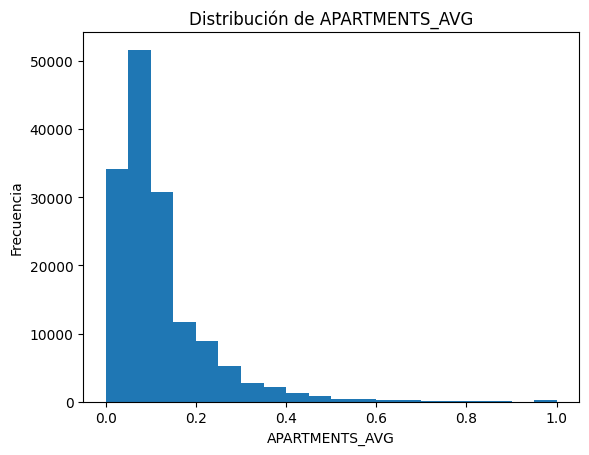

In [47]:
# Crear histograma para una característica específica (por ejemplo, APARTMENTS_AVG)
plt.hist(viviendas_df['APARTMENTS_AVG'], bins=20)
plt.xlabel('APARTMENTS_AVG')
plt.ylabel('Frecuencia')
plt.title('Distribución de APARTMENTS_AVG')
plt.show()

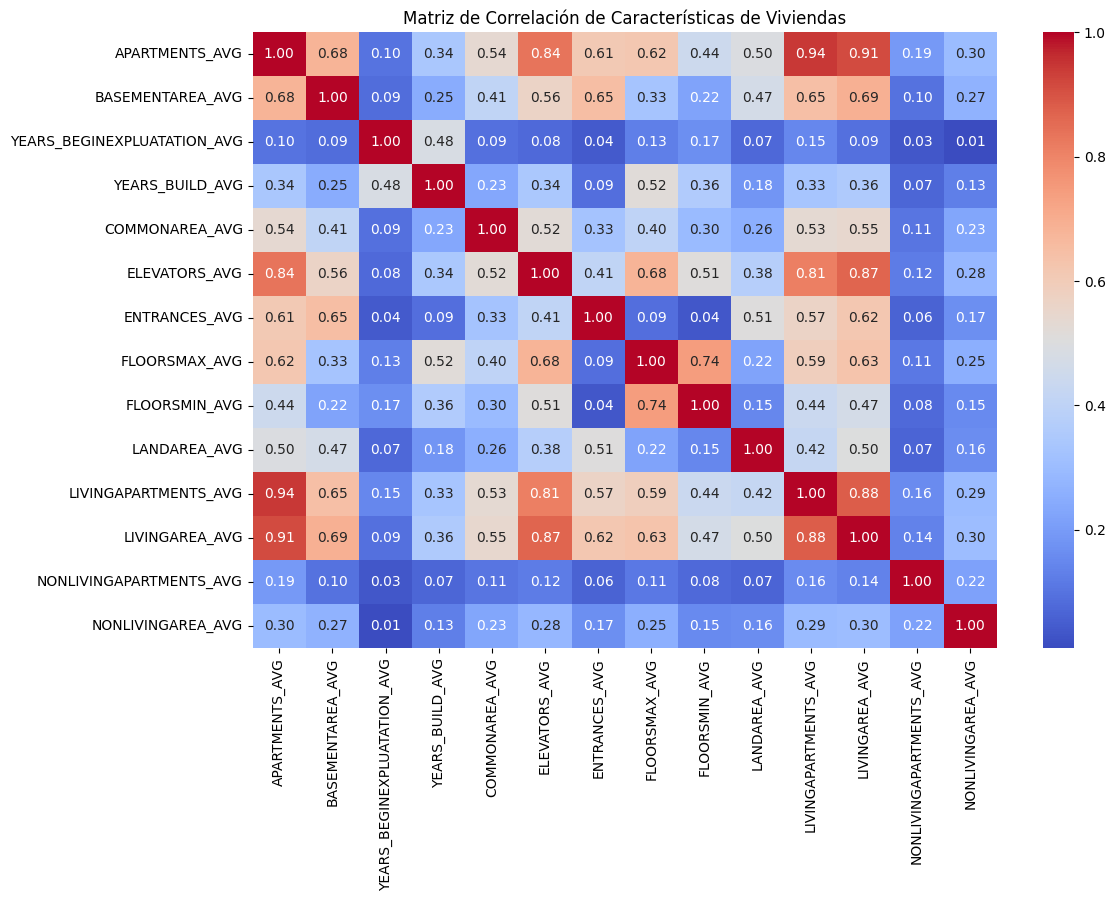

In [48]:
# Calcular la matriz de correlación
correlation_matrix = viviendas_df.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Características de Viviendas')
plt.show()

#  Contactar a los solicitantes

In [49]:
columnas_contacto = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_EMAIL']

# Crear un nuevo DataFrame
df_contacto = df[columnas_contacto]

# Contar cuántos valores verdaderos (1) hay en cada fila.
contacto_counts = df_contacto.sum()
contacto_counts

FLAG_MOBIL         307510
FLAG_EMP_PHONE     252125
FLAG_WORK_PHONE     61308
FLAG_EMAIL          17442
dtype: int64

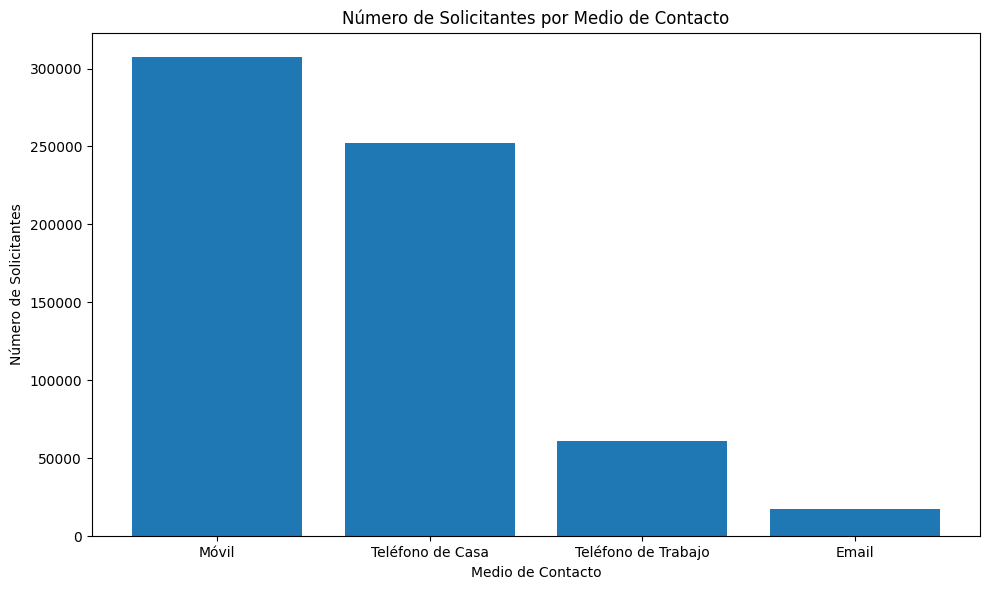

In [50]:
nombres_columnas = ['Móvil', 'Teléfono de Casa', 'Teléfono de Trabajo', 'Email']

# Ordenar los medios de contacto por el número de solicitantes
contacto_counts_sorted = contacto_counts.sort_values(ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(nombres_columnas, contacto_counts_sorted)
plt.xlabel('Medio de Contacto')
plt.ylabel('Número de Solicitantes')
plt.title('Número de Solicitantes por Medio de Contacto')
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Documentos presentados

In [51]:
# Crear un DataFrame con los tipos de documento y contar la frecuencia
document_columns = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
                    'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
                    'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
                    'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

document_counts = df[document_columns].sum()

# Mostrar los resultados
print(document_counts)


FLAG_DOCUMENT_2         13
FLAG_DOCUMENT_3     218340
FLAG_DOCUMENT_4         25
FLAG_DOCUMENT_5       4648
FLAG_DOCUMENT_6      27078
FLAG_DOCUMENT_7         59
FLAG_DOCUMENT_8      25024
FLAG_DOCUMENT_9       1198
FLAG_DOCUMENT_10         7
FLAG_DOCUMENT_11      1203
FLAG_DOCUMENT_12         2
FLAG_DOCUMENT_13      1084
FLAG_DOCUMENT_14       903
FLAG_DOCUMENT_15       372
FLAG_DOCUMENT_16      3053
FLAG_DOCUMENT_17        82
FLAG_DOCUMENT_18      2500
FLAG_DOCUMENT_19       183
FLAG_DOCUMENT_20       156
FLAG_DOCUMENT_21       103
dtype: int64


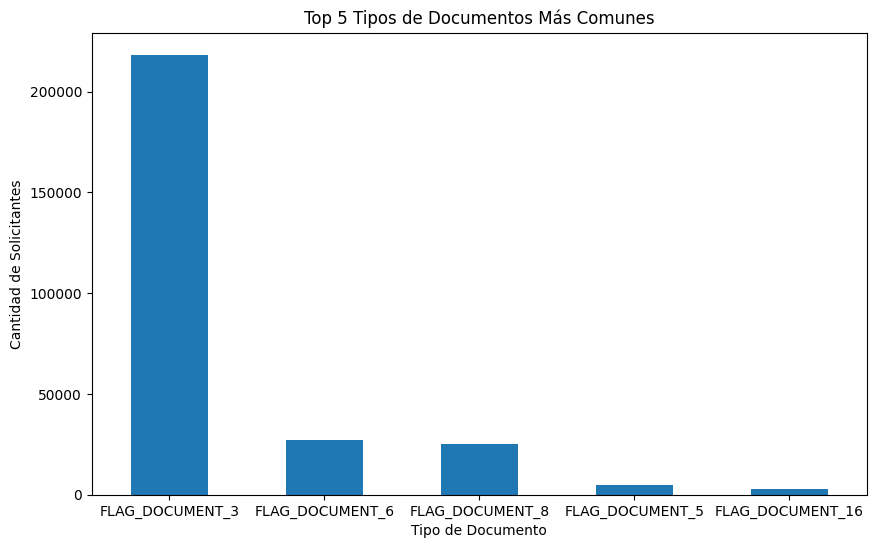

In [52]:
# Obtener los x top
top_5_documents = document_counts.nlargest(5)

# Crear un gráfico de barras para los 5 tipos de documentos más comunes
plt.figure(figsize=(10, 6))
top_5_documents.plot(kind='bar')
plt.title('Top 5 Tipos de Documentos Más Comunes')
plt.xlabel('Tipo de Documento')
plt.ylabel('Cantidad de Solicitantes')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

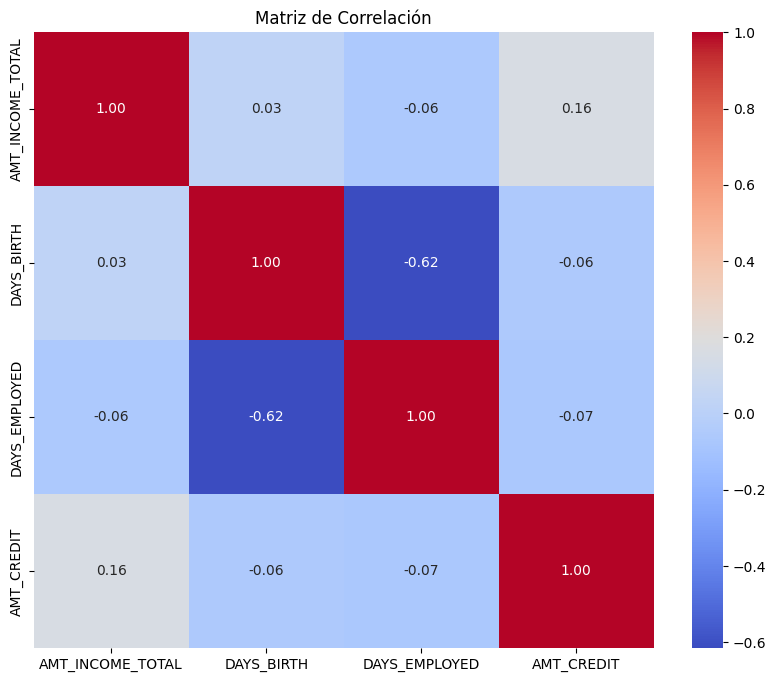

In [53]:
# Ingresos del cliente, Edad, Dias trabajando, Credito monto
columns_of_interest = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_CREDIT']
data = df[columns_of_interest]

# Calcula la matriz de correlación
correlation_matrix = data.corr()

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [58]:
num_features = df.select_dtypes(include=[int, float])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(num_features)

pca = PCA()
pca.fit(scaled_features)


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [55]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
